<a href="https://colab.research.google.com/github/prhvmm/Exploratory-Assignment/blob/master/Rand_ch5_Exploratory_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
import random as rand
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import pandas as pd

class Complete_Binary_Tree():
    def __init__(self,depth=5):
        self.graph = nx.DiGraph()
        
        self.num = 2**depth - 1
        
        self.graph.add_nodes_from([
            (i, {'marked': False}) for i in range(1,self.num+1)
        ])
        
        for i in range(1,2**(depth-1)):
            self.graph.add_edge(i, 2*i)
            self.graph.add_edge(i, 2*i+1)
            
        #print("Number of nodes: " + str(self.graph.number_of_nodes()))


    def plot_tree(self):
        pos = graphviz_layout(self.graph, prog="dot")
        nx.draw(self.graph, pos,with_labels=True)
        plt.show()


    def select(self, label, value=True):
      self.result = [
          n for n,d in self.graph.nodes(data=True) if d[label]==value
      ]
      return self.result


    def select_node(self, node):
      return self.graph.nodes[node]


    def is_marked(self, node):
      return self.graph.nodes[node]['marked']


    def mark(self, node):
      if not self.is_marked(node):
        self.graph.nodes[node]['marked'] = True
        self.propagate(node)
      #else:
        #print('node {} already marked'.format(node))

      return (node, self.select_node(node))


    def unmark(self, node):
      self.graph.nodes[node]['marked'] = False
      return (node, self.select_node(node))

    
    def get_parent(self, node):
      return list(self.graph.predecessors(node))


    def get_child(self, node):
      return list(self.graph.successors(node))


    def get_sibling(self, node):
        #print('length: %i' %len(list(self.graph.predecessors(node))))
        if(node!=1):
            parent_node = list(self.graph.predecessors(node))[0]
            siblings = list(self.get_child(parent_node))
            siblings.remove(node)
            return siblings
        else:
            return    




    def propagate(self, node):
        if(node!=1):
            sibling = self.get_sibling(node)[0]
            parent = self.get_parent(node)[0]
            if self.is_marked(sibling) and not self.is_marked(parent):
                self.mark(parent)
                self.propagate(parent)
            
            if self.is_marked(parent) and not self.is_marked(sibling):
                self.mark(sibling)
                self.propagate(sibling)
        
        children = self.get_child(node)
        

        if len(children) > 0:
            child_a, child_b = children[0], children[1]
            
            if self.is_marked(child_a) and not self.is_marked(child_b):
                self.mark(child_b)
                self.propagate(child_b)

            if self.is_marked(child_b) and not self.is_marked(child_a):
                self.mark(child_a)
                self.propagate(child_a)
      

    def stats(self):
      marked_number = len(self.select('marked'))
      unmarked_number = len(self.select('marked', False))
      total_number = self.num

      stats = ({
          'marked':marked_number, 
          'unmarked':unmarked_number, 
          'total':total_number,
      })

      return stats


    def get_mark_percent(self):
      marked_rate = len(self.select('marked')) / self.num
      return marked_rate * 100




In [ ]:


def process_1(N):
    return rand.randrange(1, N+1)


def process_2(unsent_nodes):
    if len(unsent_nodes) > 0:
        node = rand.choice(unsent_nodes)
        unsent_nodes.remove(node)
        return node
    else:
        #print('no unsent nodes')
        return


def process_3():
    unmarked_nodes = G.select('marked', False)

    if len(unmarked_nodes) > 0:
        node = rand.choice(unmarked_nodes)
        unmarked_nodes.remove(node)
        return node

    else:
        #print('no unsent nodes')
        return




    

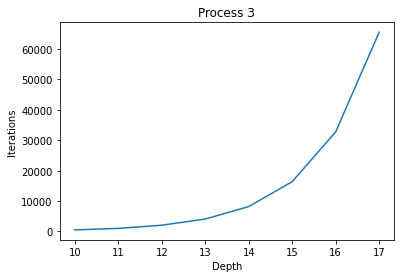

In [ ]:
process_1_result = {}
process_2_result = {}
process_3_result = {}



for depths in range(10,18):
    counter = 0
    N = 2 ** depths - 1
    unsent_nodes = list(range(1,N+1))
    G = Complete_Binary_Tree(depth=depths)
    while True:
        counter+=1
        node = process_3()
        #print('node: %i' %node)
        G.mark(node)
        #print(len(G.select('marked', False)))
        if (len(G.select('marked', False))==0):
            process_3_result[depths] = counter
            break
        

depth = list(process_3_result.keys())
iteration = list(process_3_result.values())
plt.plot(depth, iteration)
plt.title('Process 3')
plt.xlabel('Depth')
plt.ylabel('Iterations')
plt.show()

In [ ]:


data = {'Depth':depth, 'Iterations':iteration}

df = pd.DataFrame(data)



df

,Depth,Iterations
0,10,512
1,11,1024
2,12,2048
3,13,4096
4,14,8192
5,15,16384
6,16,32768
7,17,65536


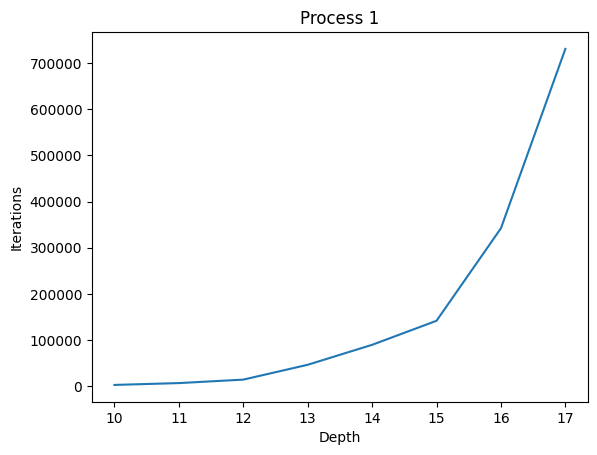

In [ ]:
plt.plot(depth, iteration)
plt.title('Process 1')
plt.xlabel('Depth')
plt.ylabel('Iterations')
plt.show()

In [ ]:
print("childs of {}: {}".format(12, G.get_child(12)))

print("parent of {}: {}".format(24, G.get_parent(24)))

print("siblings of {}: {}".format(12, G.get_sibling(12)))

childs of 12: [24, 25]
parent of 24: [12]
siblings of 12: [13]
